In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [11]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

data = pd.read_csv('/Users/bhushan/Desktop/venv/Chennai Water Quality 02/Data/output.csv')
X = data.drop(columns=['DBU Class'])  
y = data['DBU Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
dt = DecisionTreeClassifier(max_depth=4, random_state=22)
knn = KNeighborsClassifier(n_neighbors=5)

dt.fit(X_train, y_train)
knn.fit(X_train, y_train)

dt_preds = dt.predict(X_test)
knn_preds = knn.predict(X_test)

hybrid_preds = []
for i in range(len(dt_preds)):
    # If KNN predicts 'C', prioritize it by leaning more towards KNN prediction
    if knn_preds[i] == 'C':
        hybrid_preds.append(knn_preds[i])
    else:
        # If it's not 'C', rely equally on both predictions
        if dt_preds[i] == knn_preds[i]:
            hybrid_preds.append(dt_preds[i])  # If both agree, choose either
        else:
            # If they disagree, rely on Decision Tree's prediction for classes A, B, DE
            hybrid_preds.append(dt_preds[i])

accuracy = accuracy_score(y_test, hybrid_preds)
print("Hybrid Model Accuracy:", accuracy)

Hybrid Model Accuracy: 0.9217081850533808


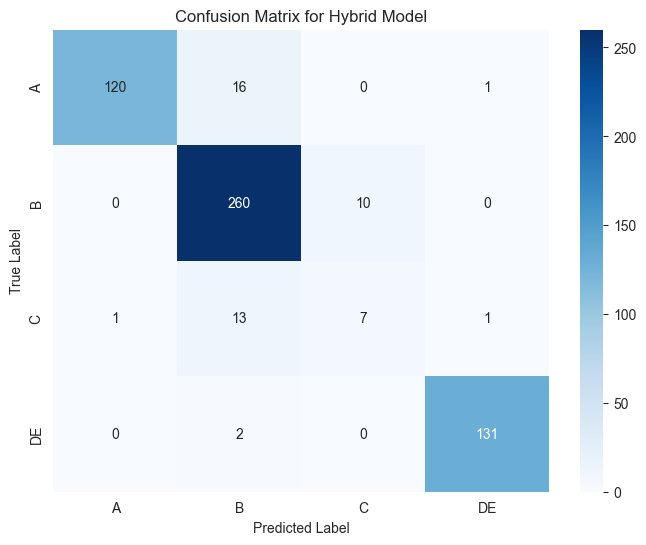

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for hybrid predictions
cm = confusion_matrix(y_test, hybrid_preds, labels=dt.classes_)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Hybrid Model")
plt.show()